# What's an intuitive way to think of cross entropy

**Source:**

> - [What's an intuitive way to think of cross entropy](https://www.quora.com/Whats-an-intuitive-way-to-think-of-cross-entropy)

# A Gentle Introduction to Information Entropy

**Source:**

>- [A Gentle Introduction to Information Entropy](https://machinelearningmastery.com/what-is-information-entropy/)

## What is information theory

Information theory is field of study concerned with quantifying information for communication.

*信息论是涉及量化沟通信息的研究领域.*

A foundational concept from information is the quantification of the amount of information in things like events, random variables, and distribution.

*信息的一个基本概念是对诸如事件, 随机变量和分布的信息量的量化.*

> *Why unify information theory and machine learning? Because they are two side of the ame coin. Information theory and machine learning still alone together.*

## Calculate the information for an event

Quantifying information is the foundation of field of information theory.

The intuition behind quantifying information is the idea of measuring how much surprise there is in an event. Those events that rare (low probability) are more surprising and therefore have more information those events that there are common (high probability).

- **Low probability event:** High information (surprising).
- **High probability event:** Low information (unsurprising).

Rare events are more uncertain or more surprising and require more information to represent them than common events.

We can calculate the amount of information there is in an event using the probability of the event. This is called *"Shannon information", "self-information"*, or simply the *"information"*, and can be calculated for a discrete event $x$ as follows:

- $information(x) = -\log_2(p(x))$

Where $p(x)$ is the probability of the event $x$.

The choice of the 2-base logarithm means that the units of information measure is in bits(binary digits).

The calculate of information is often written as $h()$ for example:

- $h(x) = -\log_2(p(x))$

The negative sign ensures that the result is always positive or zero.

Information will be zero when the probability of an event is $1.0$ or a certainty, e.g. there is no surprise.

Let's make this concrete with some examples.

Consider a flip of a single fair coin. The probability of heads(and tails) is 0.5. We can calculate the information for flipping a head in Python

In [1]:
import numpy as np

In [2]:
p = 0.5
h = -np.log2(p)
print(f'p(x)={p}, information: {h}')

p(x)=0.5, information: 1.0


## Calculate the Entropy for a Random Variable

$
H(X)=-\displaystyle\sum_{k \in K} p_k \log(p_k)
$

上面的公式含义是, $H(X)$ 表示随机变量 $X$ 的熵, 它等于随机变量 $X$ 的 $K$ 种状态下, 每种状态 $k$ 的概率 $p_k$ 乘以 每种状态 $k$ 的概率的对数 $\log(p_k)$.

The lowest entropy is calculated for random variable that has a single event with a probability of 1.0, a certainly.

*随机变量熵的最小值为 $0$, 也就是当随机变量只有一个事件, 换句话说就是该随机变量的概率为 $[1]$. 带入公式很容易得到熵的结果为 $0$*

The largest entropy for a random variable will be if all events are equally likely.

*当随机变量中的各种状态 $k \in K$ 的概率相等(均匀分布), 此时该随机变量的熵值最大(从下图可以直观的观察到).*

In [17]:
import numpy as np
import matplotlib.pyplot as plt

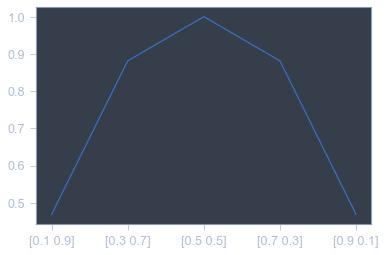

In [60]:
prob_1 = np.linspace(.1, .9, 5)
prob_2 = 1 - prob_1
pair_prob = np.vstack((prob_1, prob_2))
entropy = pair_prob * np.log2(pair_prob)
entropy = -1 * np.sum(entropy, axis=0)
x = np.arange(len(entropy))

plt.xticks(ticks=x, labels=np.array2string(pair_prob.T)[1:-1].split('\n '))
plt.plot(x, entropy)
plt.show()

# A Gentle Introduction to Cross-Entropy for Machine Learning

**Source:**

> - [A Gentle Introduction to Cross-Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

**Cross-Entropy:** builds upon the idea of entropy from information theory and calculates the number of bits required to represent or transmit an average event from on distribution compared to another distribution.

*交叉熵建立在信息论的熵概念之上, 用于计算一个分布中的平均事件用另外一个分布来代表或传输所需的位数(bits)*

The intuition for this definition comes if we consider a target or underlying probability distribution P and an approximation of the target distribution Q, the cross-entropy of Q from P is the number of additional bits to represent an event using Q instead of P.

*直觉上来讲, 如果我们假设一个目标概率分布为 P 和一个接近或类似该目标的概率分布 Q, 则交叉熵表示的是用 Q 来代表 P 中的一个事件所需要的位数(bits).*

$H(P,Q) = -\displaystyle\sum_{x \in P} P(x) \log(Q(x))$

如果 P 和 Q 分布完全一致, 则交叉熵等于 P 或 Q 的熵.

> **Note:** this notation looks a lot like the joint probability, or more specifically, the joint entropy between P and Q. This is misleading as we scoring the difference between probability distributions with cross-entropy. Whereas, joint entropy is a different concept that uses the same notation and instead calculates the uncertainly across two(or more) random variables.

> *__注意:__* 上面的公式看起来很像联合概率的公式, 或者更具体的说, 是 P 和 Q 的联合熵. 这是一个误导, 交叉熵是用来给概率分布间的不同来打分的. 而联合熵是另一个概念, 它表示的是两个(或更多)的随机变量间的不确定性.

The cross-entropy is not symmetrical, meaning that:

$H(P,Q) \neq H(Q,P)$

## Cross-Entropy vs. KL Divergence

交叉熵与 KL 散度

The KL Divergence is the average number of extra bits need to encode the data, due to the fact that we used distribution Q to encode the data instead of the true distribution P.

*KL 散度是基于我们使用分布 Q 代替真实的分布 P 去加密数据, 所需要的额外的位数(bits)的平均值.*

- **Cross_Entropy:** Average number of total bits to represent an event from Q instead of P.
- **Relative Entropy(KL Divergence):** Average number of extra bits to represent an event from Q instead of P.


## Cross-Entropy as Loss Function

Each example has a know class label with a probability of 1.0, and a probability with 0.0 for all other labels. A model can estimate the probability of an example belonging to each class label. Cross-Entropy can then be used to calculate the difference between the two probability distribution.

As such, we can map the classification of one example onto the idea of random variable with a probability distribution as follows:

- **Random Variable:** The example for which we require a predicted class label. (*__随机变量:__ 我们需要去预测类标签的样本*)
- **Events:** Each class label that could be predicted. (*__事件:__ 可预测的每个类标签*)

在分类问题中, 我们分别用 $y$ 和 $\hat{y}$ 表示实际概率和预测概率.

- **Expected Probability($y$):** 某一个样本的每个分类的实际概率.
- **Predicted Probability($\hat{y}$):** 通过模型得到的某一个样本的每个分类的预测概率.

某一个样本真实的分类概率分布可以表示为 $P$, 其预测的分类概率分布可以表示为 $Q$

$H(P,Q)=-\displaystyle\sum_{x \in X} P(x) \log(Q(x))$

对于二分类问题交叉熵的公式可以表示为:

$H(P,Q)=-(P(class0)\log(Q(class0)) + P(class1)\log(Q(class1)))$

在二分类问题中, 我们通常采用伯努利最为概率预测模型, 因此分类为 1 的标签将作为预测结果, 分类为 0 的标签为 1 - 预测结果, 可以表示如下:

- **Predicted $P(class1) = \hat{y}$**
- **Predicted $P(class0) = 1 - \hat{y}$**

## Calculate Entropy for Class Label

假设我们有一个 2 分类问题, 用性别来分类, 类别分别是"男"和"女", 那么对于某一个样本它的性别是"男", 我们可以用 [1, 0] 来表示它的概率分布, 如果性别是"女", 则用 [0,1] 来表示概率分布.

在上面的描述中, 随机变量是"性别", 事件分别是"男"和"女", 概率分布 P 在性别是"男"的情况下, 表示为 [1, 0], 在"女"的情况下 [0, 1].

现在我们假设有这么一条性别是"男"的样本, 预测结果为 0.8, 那么交叉熵的计算过程如下:

In [1]:
import numpy as np

In [9]:
def cross_entropy(p, q, est=1e-15):
    log2_q = np.log2(q + est)
    k = p * log2_q
    return round(-1 * k.sum(), 4)
    
# 真实的分类概率分布
p = np.array([1, 0])
# 预测的分类概率分布
q = np.array([0.8, 0.2])
# 交叉熵
ce = -1 * p[0] * np.log2(q[0]) + p[1] * np.log2(q[1])
round(ce, 4), cross_entropy(p, q)

(0.3219, 0.3219)

# An introduction to entropy, cross entropy and KL divergence in machine learning

**Source:**

> - [An introduction to entropy, cross entropy and KL divergence in machine learning](https://adventuresinmachinelearning.com/cross-entropy-kl-divergence/)

# Information Gain and Mutual Information for Machine Learning

**Source:**

> - (Information Gain and Mutual Information for Machine Learning)[https://machinelearningmastery.com/information-gain-and-mutual-information/]

$
I(X;Y) = H(Y) - H(Y|X)
$

# How to Calculate the KL Divergence for Machine Learning

**Source:**

> - (How to Calculate the KL Divergence for Machine Learning)[https://machinelearningmastery.com/divergence-between-probability-distributions/]